## Test flux calculations

Testing output of ```fluxes.py```.

In [70]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import thermo

%matplotlib inline

In [71]:
dir_flux = "./fluxes_levlegs/"
fnames_flux = [f for f in os.listdir(dir_flux) if f.endswith('.nc')]

In [72]:
dir_prf = "../../data/WP3/cloud_modules/"
fnames_prf = [f for f in os.listdir(dir_prf) if f.endswith('.nc')]

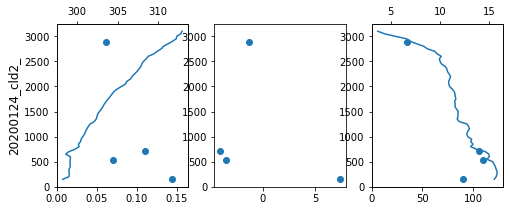

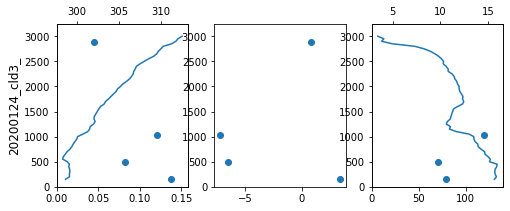

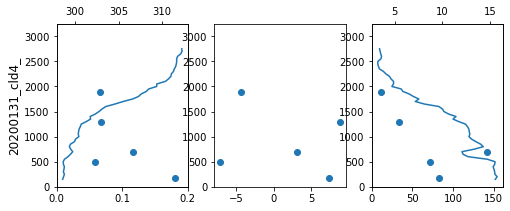

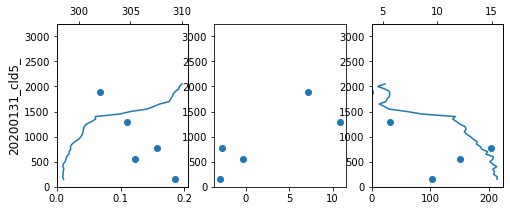

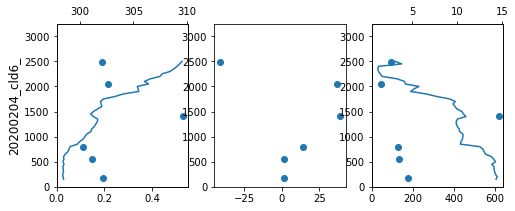

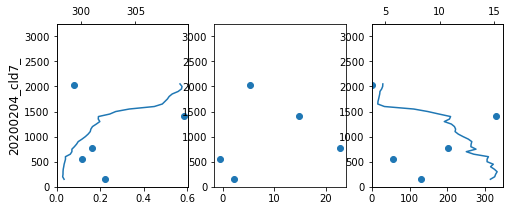

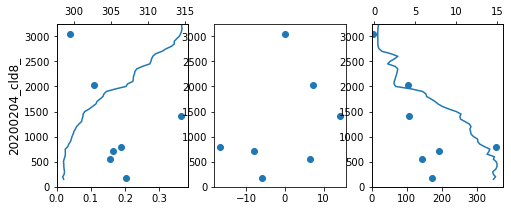

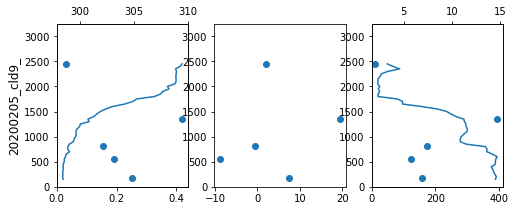

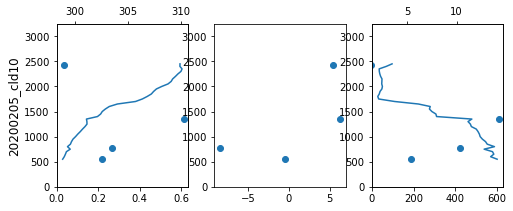

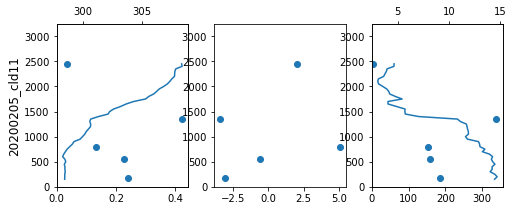

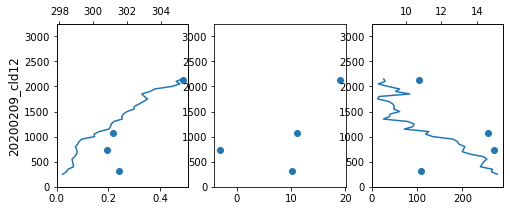

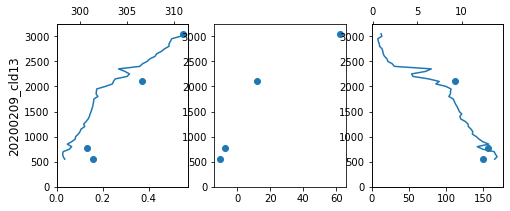

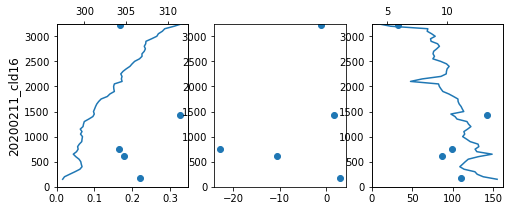

In [74]:
ncld = np.arange(1, 17, 1).astype(str)

for n in ncld:
    
    fname_flux = [f for f in fnames_flux if "_cld%s_" % n in f]
    if len(fname_flux) == 0: continue
    fname_flux = fname_flux[0]
    fname_prf = [f for f in fnames_prf if "_%s.nc" % n.zfill(2) in f]
    fname_prf = fname_prf[0]
    
    
    fluxes = xr.load_dataset(dir_flux + fname_flux)
    prf = xr.load_dataset(dir_prf + fname_prf)
    prfmean = prf.groupby(np.round(prf['alt']/50)*50).mean()

    
    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    for k, ax in zip(["w'w'_bar", "flux_sh", "flux_lh"], axes):
        ax.scatter(fluxes[k], fluxes['alt'])
    
    
    axes[2].twiny().plot(prfmean['mr'], prfmean['alt'])
    theta = thermo.ptemp(prfmean['Ta'], prfmean['press'])
    axes[0].twiny().plot(theta, prfmean['alt'])
    
    
    axes[0].set_ylabel(fname_flux[4:18], fontsize=12)
    for ax in axes:
        ax.set_ylim(0, 3250)
    axes[0].set_xlim(0, np.max(fluxes["w'w'_bar"]+0.02))
    axes[2].set_xlim(0, np.max(fluxes["flux_lh"]+20))



In [68]:
prfmean

<xarray.Dataset>
Dimensions:     (alt: 63)
Coordinates:
  * alt         (alt) float64 150.0 200.0 250.0 ... 3.15e+03 3.2e+03 3.25e+03
Data variables:
    mr          (alt) float32 14.18 13.01 12.51 12.32 ... 8.383 5.284 4.201
    dD          (alt) float32 -66.77 -68.83 -69.83 ... -101.5 -117.5 -127.7
    rh          (alt) float32 73.54 67.97 64.52 62.52 ... 95.48 58.52 44.07
    lat         (alt) float32 13.24 13.2 13.18 13.21 ... 13.25 13.25 13.25 13.25
    lon         (alt) float32 -58.63 -58.72 -58.71 ... -58.38 -58.65 -58.66
    Ta          (alt) float32 297.4 297.2 297.3 297.5 ... 279.8 280.2 280.9
    press       (alt) float32 999.8 995.2 989.5 984.5 ... 701.6 696.8 695.7
    wvel        (alt) float32 -12.71 -12.79 -12.88 ... -11.73 -12.34 -12.11
    RH          (alt) float32 76.93 70.5 66.6 63.55 ... 100.6 104.1 61.42 51.32
    alt_CT      (alt) float32 nan nan nan nan nan ... 3.056 3.108 2.694 2.676
    SST_IR_est  (alt) float32 nan nan nan nan nan nan ... nan nan nan 298.6 nan
    levlegflag  (alt) float64 1.0 1.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 5.0 5.0